In [66]:
from PIL import Image

pil_im = Image.open('empire.jpeg').convert('L')

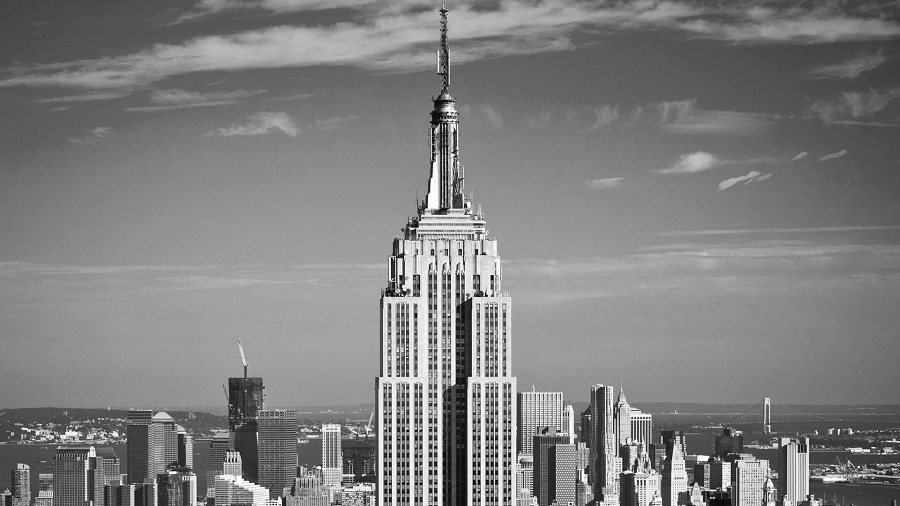

In [67]:
pil_im

In [68]:
pil_im.size

(900, 506)

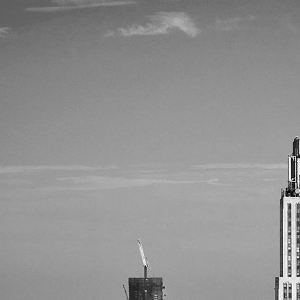

In [69]:
box = (100,100,400,400)
region = pil_im.crop(box)
region

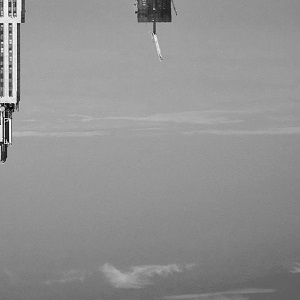

In [70]:
region = region.transpose(Image.ROTATE_180)
region

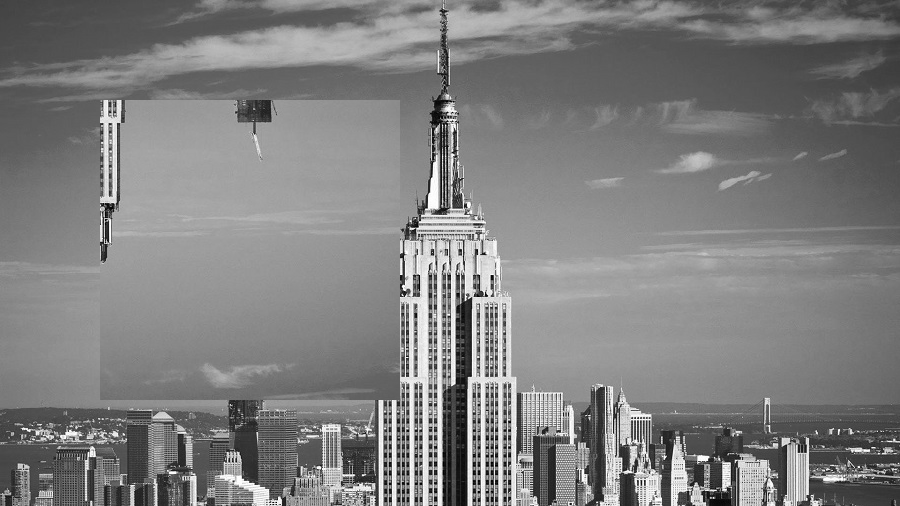

In [71]:
pil_im.paste(region, box)
pil_im

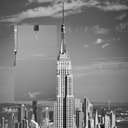

In [72]:
out = pil_im.resize((128, 128))
out

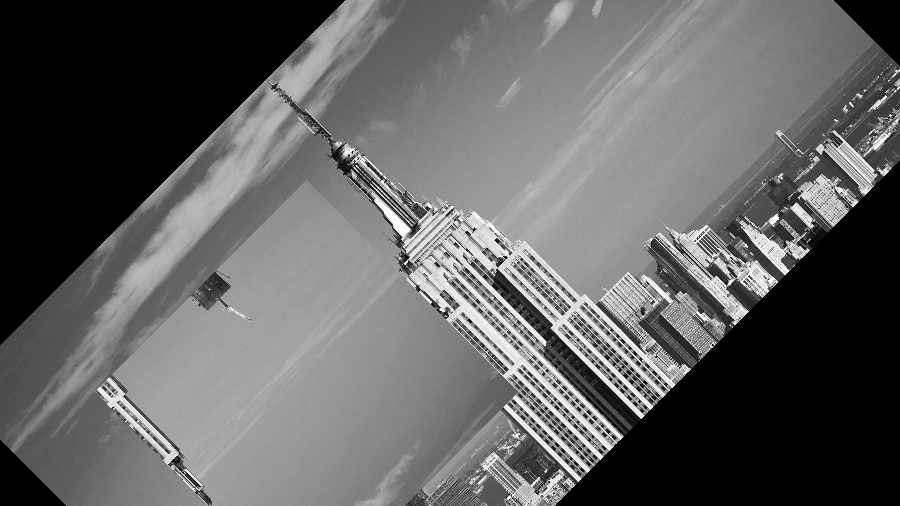

In [73]:
out = pil_im.rotate(45)
out

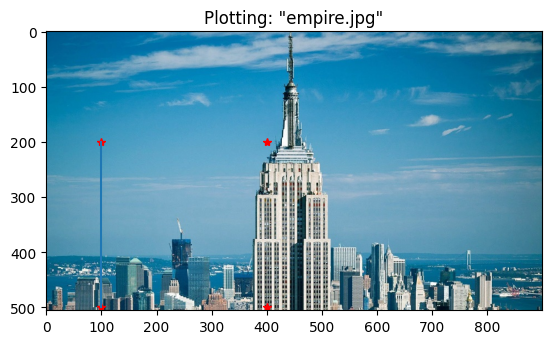

In [74]:
from PIL import Image
from pylab import * 

# read image to array
im = array(Image.open("empire.jpeg"))
# plot the image
imshow(im)
# some points
x = [100,100,400,400]
y = [200,500,200,500]
# plot the points with red star-markers
plot(x,y,"r*")
# line plot connecting the first two points
plot(x[:2],y[:2])
# add title and show the plot
title('Plotting: "empire.jpg"')
show()

(0.5, 899.5, 0.5, 505.5)

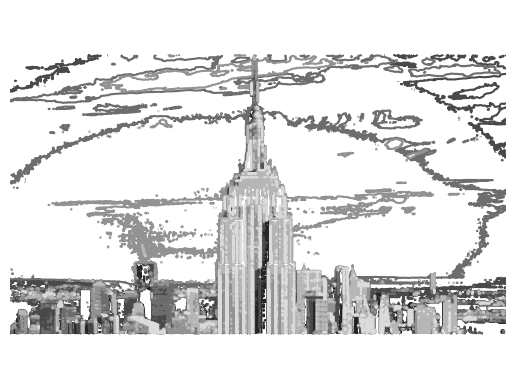

In [75]:
from PIL import Image
from pylab import *

im = array(Image.open('empire.jpeg').convert('L'))

figure()
gray()

contour(im, origin='image')
axis('equal')
axis('off')

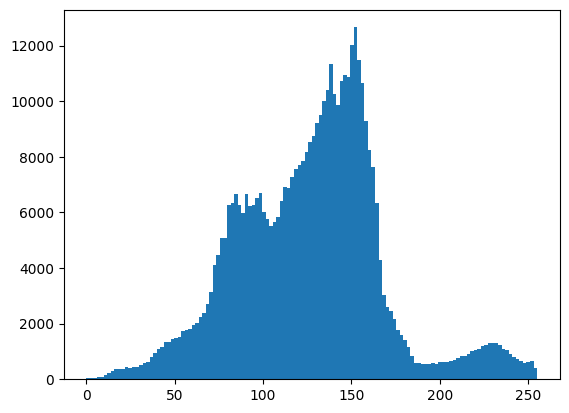

In [76]:
figure()
hist(im.flatten(), 128)
show()

In [77]:
from PIL import Image
from numpy import *

im = array(Image.open('empire.jpeg').convert('L'))
im2 = 255 - im
im3 = (100.0/255) * im + 100
im4 = 255.0 * (im/255.0)**2

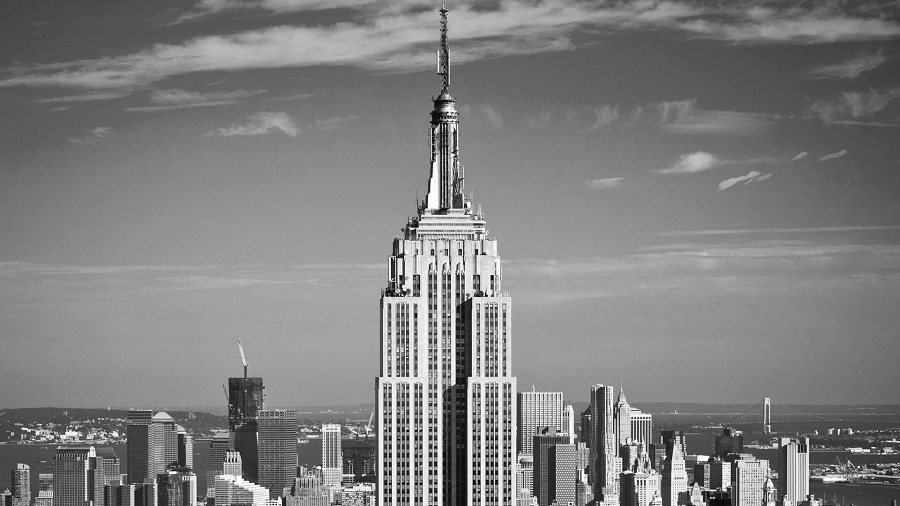

In [78]:
Image.fromarray(im)

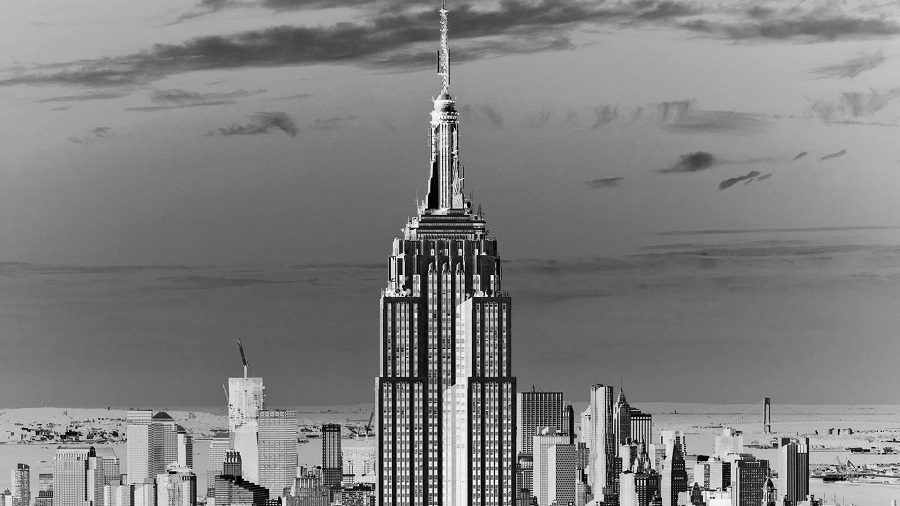

In [79]:
Image.fromarray(im2)

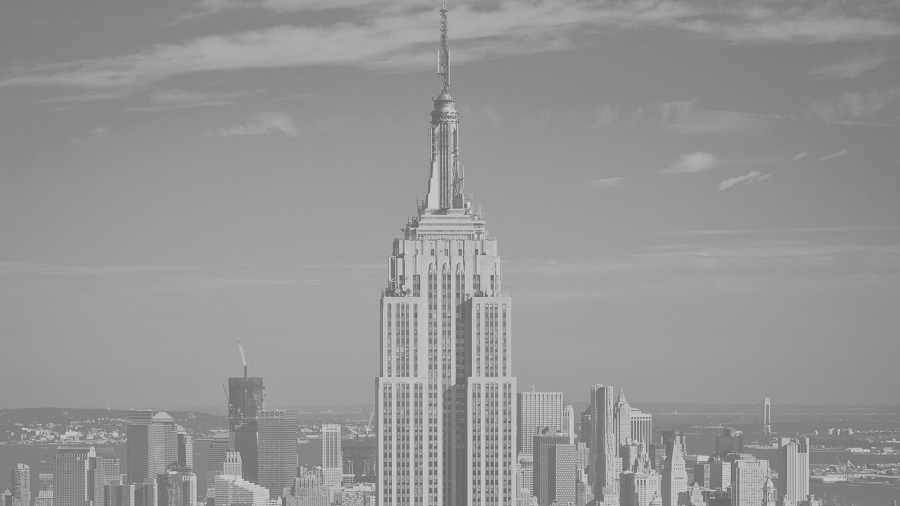

In [80]:
Image.fromarray(uint8(im3))

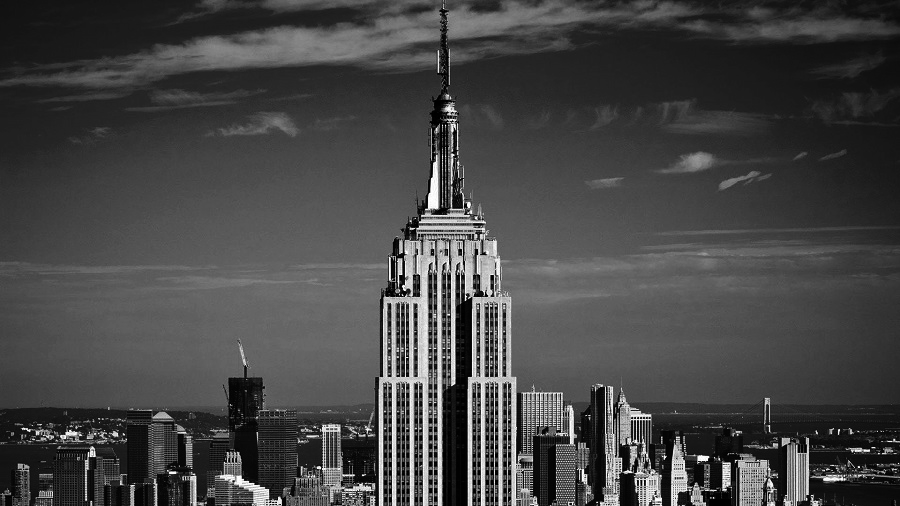

In [81]:
Image.fromarray(uint8(im4))

In [82]:
def imresize(im, sz):
    pil_im = Image.fromarray(uint8(im))
    return array(pil_im.resize(sz))

In [83]:
def histeq(im, nbr_bins = 256):
    imhist, bins = histogram(im.flatten(), nbr_bins, density=True)
    cdf = imhist.cumsum()
    cdf = 255 * cdf / cdf[-1]

    im2 = interp(im.flatten(), bins[:-1], cdf)
    return im2.reshape(im.shape), cdf

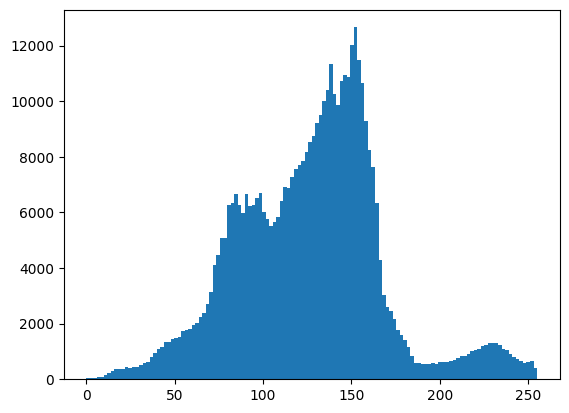

In [89]:
from PIL import Image
from numpy import *

im = array(Image.open('empire.jpeg').convert('L'))

figure()
hist(im.flatten(), 128)
show()

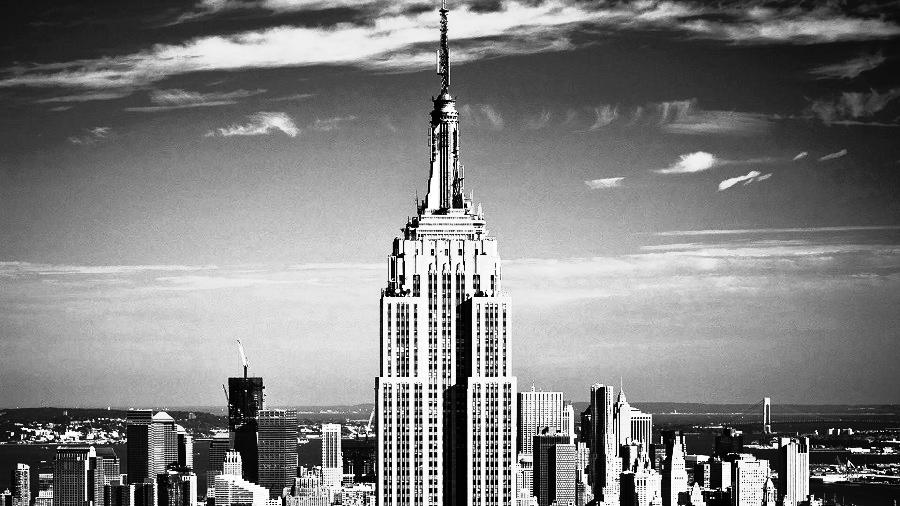

In [92]:
im2, cdf = histeq(im)
Image.fromarray(uint8(im2))

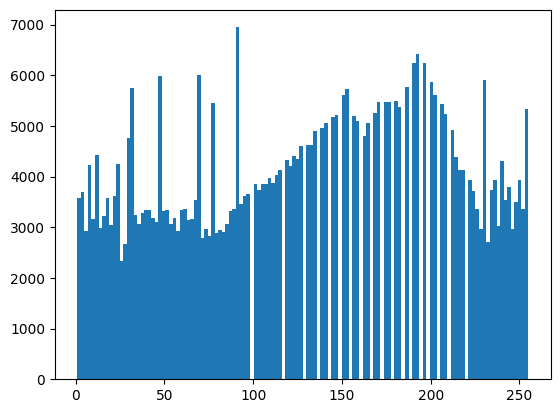

In [93]:
figure()
hist(im2.flatten(), 128)
show()

In [96]:
def compute_average(imlist):
    averageim = array(Image.open(imlist[0]), 'f')

    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print (imname + '...skipped')
    averageim /= len(imlist)
    # return average as uint8
    return array(averageim, 'uint8')

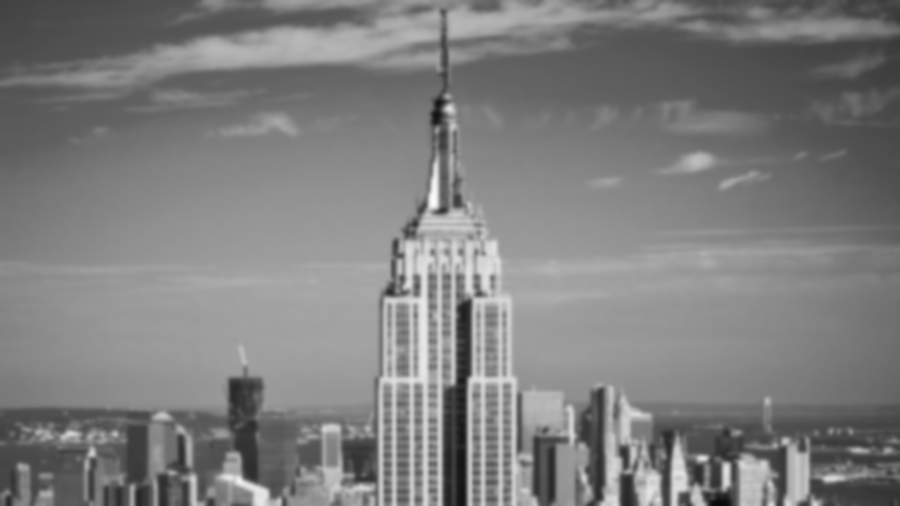

In [104]:
from scipy import ndimage

im = array(Image.open('empire.jpeg').convert('L'))
im2 = ndimage.gaussian_filter(im, 2)
Image.fromarray(im2)


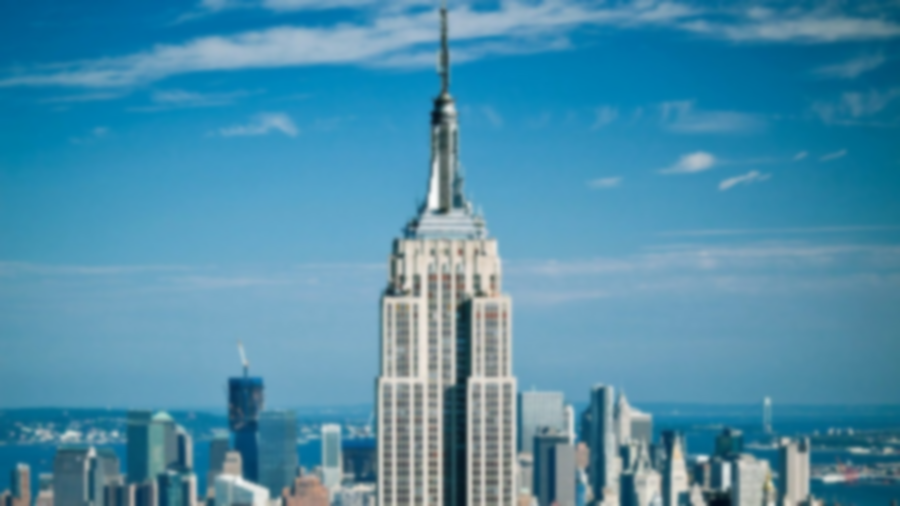

In [106]:
im = array(Image.open('empire.jpeg'))
im2 = zeros(im.shape)
for i in range (3):
    im2[:, :, i] = ndimage.gaussian_filter(im[:, :, i], 2)
im2 = uint8(im2)
Image.fromarray(im2)

In [145]:
im = array(Image.open('Tiger.jpg').convert('L'))
imx = zeros(im.shape)
ndimage.sobel(im, 1, imx)

imy = zeros(im.shape)
ndimage.sobel(im, 1, imy)

magnitude = sqrt(imx**2+imy**2)

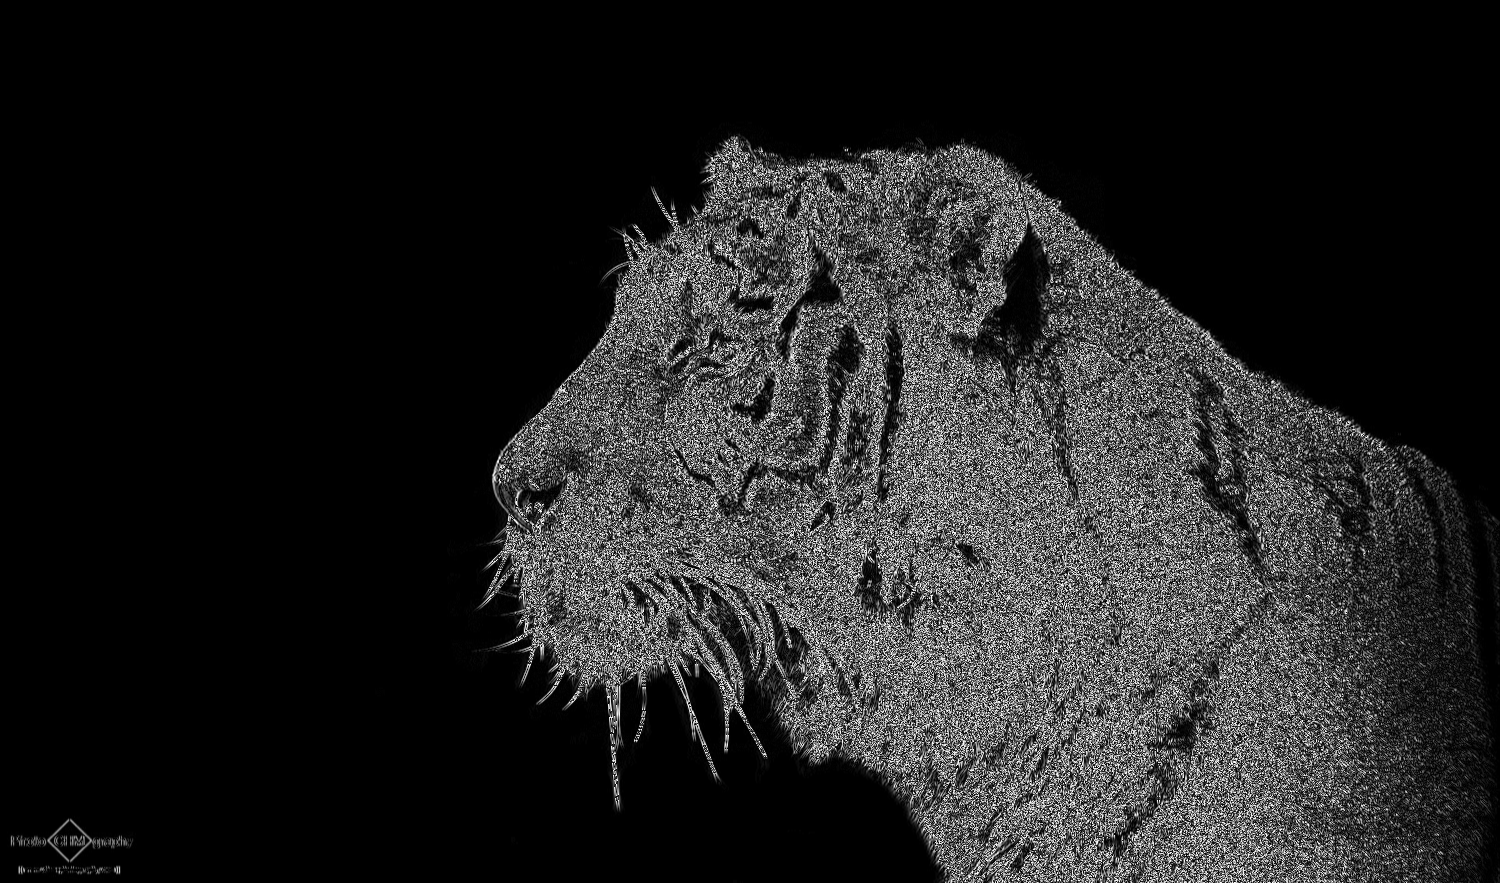

In [146]:
Image.fromarray(uint8(magnitude))

In [149]:
im = array(Image.open('Tiger.jpg').convert('L'))

sigma = 2

imx = zeros(im.shape)
ndimage.gaussian_filter(im, (sigma, sigma), (0, 1), imx)

imy = zeros(im.shape)
ndimage.gaussian_filter(im, (sigma, sigma), (1, 0), imy)

magnitude = sqrt(imx**2+imy**2)

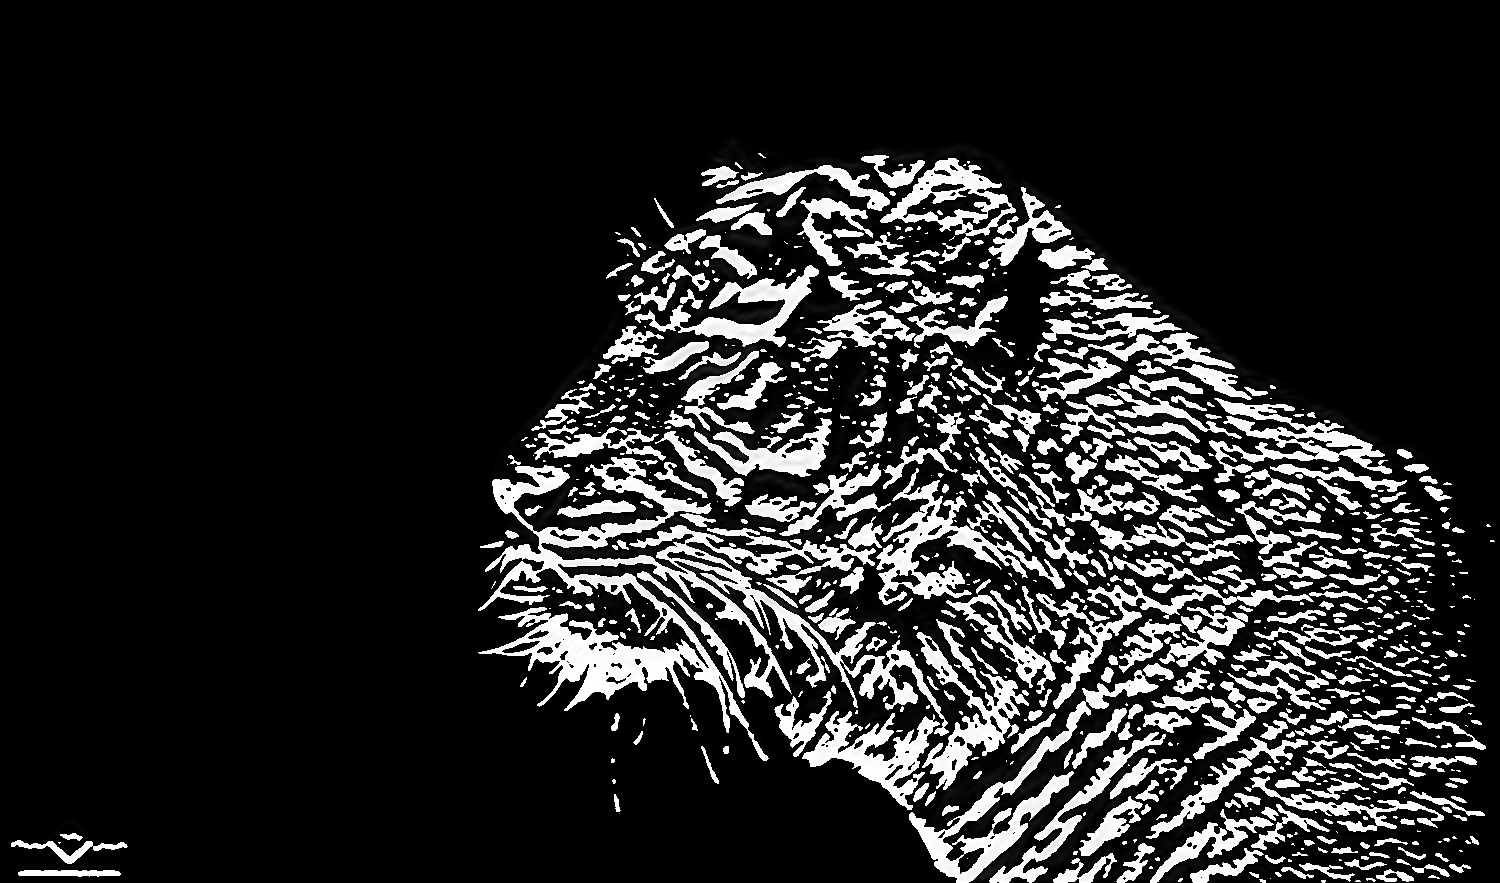

In [150]:
Image.fromarray(uint8(imy))

In [151]:
from numpy import *
def denoise(im,U_init,tolerance=0.1,tau=0.125,tv_weight=100):
    """ An implementation of the Rudin-Osher-Fatemi (ROF) denoising model
    using the numerical procedure presented in eq (11) A. Chambolle (2005).
    Input: noisy input image (grayscale), initial guess for U, weight of
    the TV-regularizing term, steplength, tolerance for stop criterion.
    Output: denoised and detextured image, texture residual. """
    m,n = im.shape #size of noisy image
    # initialize
    U = U_init
    Px = im #x-component to the dual field
    Py = im #y-component of the dual field
    error = 1
    while (error > tolerance):
        Uold = U
        # gradient of primal variable
        GradUx = roll(U,-1,axis=1)-U # x-component of U’s gradient
        GradUy = roll(U,-1,axis=0)-U # y-component of U’s gradient
        # update the dual varible
        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = maximum(1,sqrt(PxNew**2+PyNew**2))
        Px = PxNew/NormNew # update of x-component (dual)
        Py = PyNew/NormNew # update of y-component (dual)
        # update the primal variable
        RxPx = roll(Px,1,axis=1) # right x-translation of x-component
        RyPy = roll(Py,1,axis=0) # right y-translation of y-component
        DivP = (Px-RxPx)+(Py-RyPy) # divergence of the dual field.
        U = im + tv_weight*DivP # update of the primal variable
        # update of error
        error = linalg.norm(U-Uold)/sqrt(n*m);
    return U,im-U # denoised image and texture residual

In [160]:
from numpy import random
# create synthetic image with noise
im = zeros((500,500))
im[100:400,100:400] = 128
im[200:300,200:300] = 255
im = im + 30*random.standard_normal((500,500))
U,T = denoise(im,im)
G = ndimage.gaussian_filter(im,10)

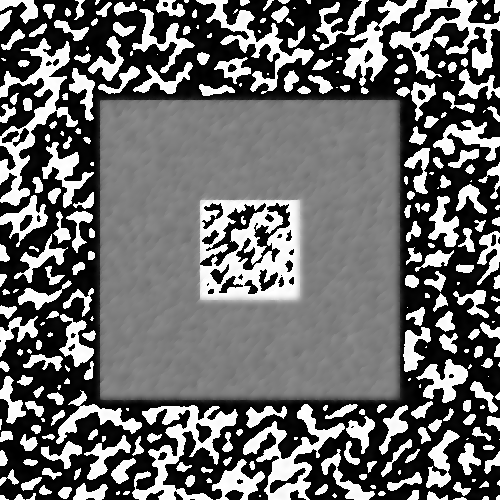

In [163]:
Image.fromarray(uint8(U))